# Single Neuron Linear Regression Model

Many types of problems and data fall into this roughly linear relationship. For example, one could reasonably suspect that such a relationship exists when considering the palmer penguin dataset Gentoo species bill length as feature measurements together with the penguin dataset Gentoo species bill width as targets. This can be verified by visualizing the data.

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

# Import Penguin Dataset as a Dataframe object
pg = pd.read_csv("https://raw.githubusercontent.com/yw110-1/INDE-577/main/Data/penguins.csv")
pg = pg.dropna()
pg = pg[pg['species'] == 'Gentoo'][['bill_length_mm', 'bill_depth_mm']]
pg.head()

,bill_length_mm,bill_depth_mm
152,46.1,13.2
153,50.0,16.3
154,48.7,14.1
155,50.0,15.2
156,47.6,14.5


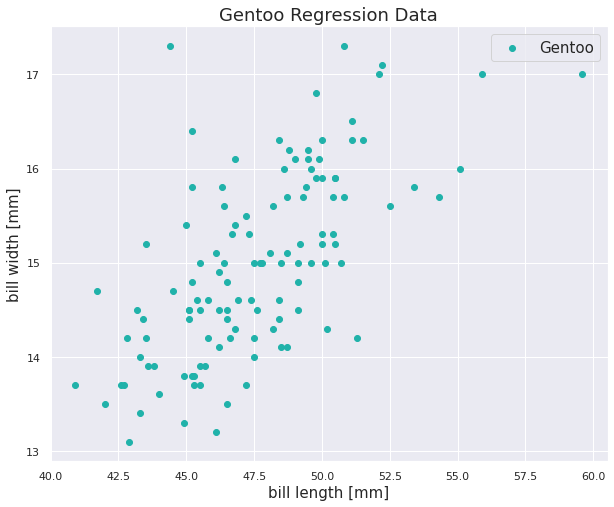

In [10]:
plt.figure(figsize = (10, 8))
plt.scatter(pg.bill_length_mm, 
            pg.bill_depth_mm, 
            color = "lightseagreen",
            label = "Gentoo")
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill width [mm]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Gentoo Regression Data", fontsize = 18)
plt.show()

We can see that there is a linear relationship between the two variables.

## Training the dataset

First, for single neuron models in practice, stochastic gradient descent should be the preferred way for optimizing the weights and bias by minimizing the cost function. We implement stochastic gradient descent with the train method used in the following custom ```SingleNeuron``` class.

In [11]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

## Quick Data Formatting

Now that we have defined our custom SingleNeuron class, we next prep our data for training. By running the following code in the cell below, note that the first two lines of code convert the setosa sepal length column of data into a ```numpy.ndarray```.

CAUTION: Single entry feature vectors need to be reshaped using the reshape (-1, 1) method. This is needed because of the dimensions required for vector and matrix multiplications.

In [12]:
X = pg.bill_length_mm.values
X = X.reshape(-1, 1)
y = pg.bill_depth_mm.values

## Creating and Training an Instance of the SingleNeuron Class

In order to instantiate a given instance the ```SingleNeuron``` model, we need to first define an activation function. After doing so, we can then instantiate a ```SingleNeuron``` object. After creating this ```SingleNeuron```, we can then train it by calling the ```train()``` method with input X and y. For demonstration purposes, we also pass the keyword arguments alpha = 0.0001 and epochs = 5 into the ```train()``` method.

In [14]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0001, epochs = 5)

Now that we have created an instance of the ```SingleNeuron``` class and called the train method, we can visualize the linear regression line by scatter plotting the data and also ploting the predicted output over some domain within the range of values of input features.

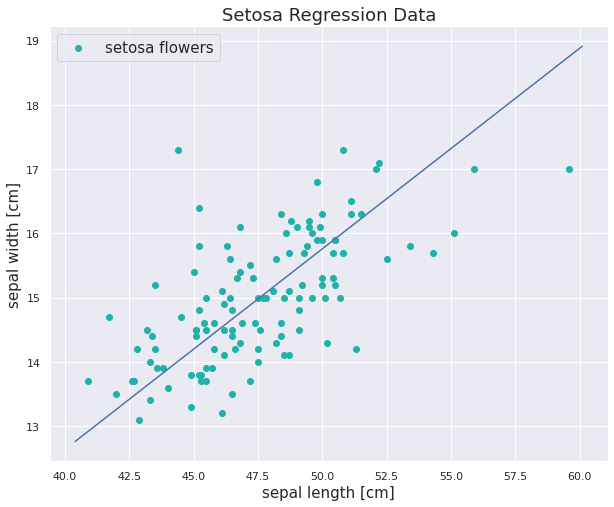

In [15]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "setosa flowers")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]", fontsize = 15)
plt.title("Setosa Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()


The line generated by our custom ```SingleNeuron``` class surely does not look random. We can verify this by plotting the ```errors_``` attribute that we stored while training. Note that the $i$-th entry of ```the errors_``` attribute is the mean-sqaured error of the neuron after the $i+1$ epoch of stochastic gradient descent. If the mean sqaured error is decreasing after each epoch we are on the right track, and our single neuron might be learning.

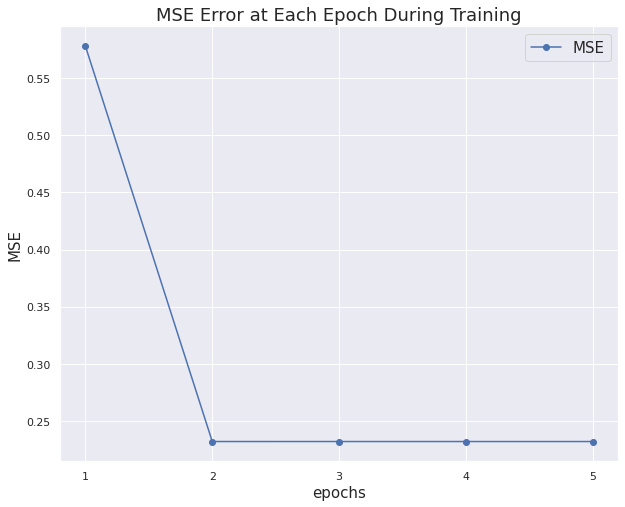

In [16]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

## Visualize Errors over each Epoch

The mean-sqaured error is decreasing over each epoch. Then we will see what happens when we training a single neuron over 10 times more epochs than before, while leaving the learning rate unchanged.

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

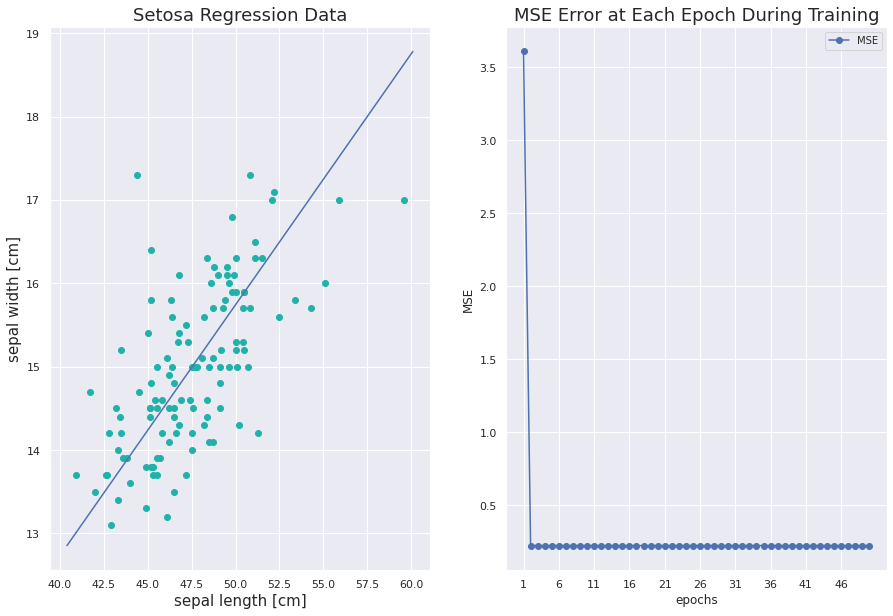

In [17]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("sepal length [cm]", fontsize = 15)
ax1.set_ylabel("sepal width [cm]", fontsize = 15)
ax1.set_title("Setosa Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

## Experiment with Learning Rate

The choice of learning rate is a crucial hyperparamter when implementing gradient (and stochastic gradient) descent. We can view different choices of learning rate with a fixed number of epochs.

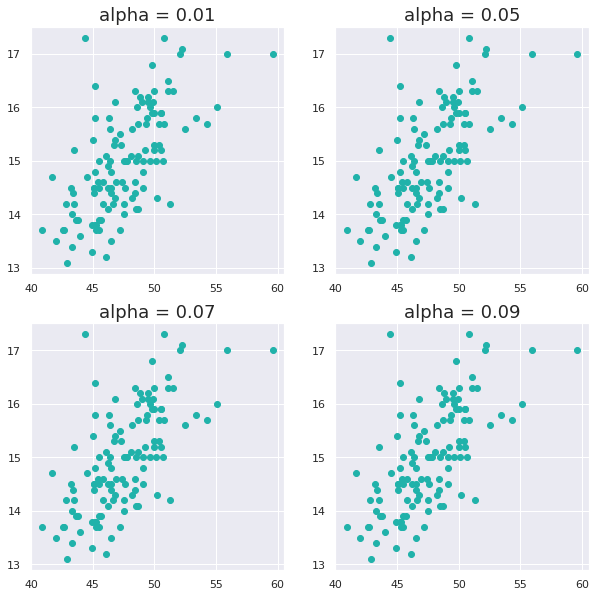

In [20]:
# Possible choices of learning rate 
alphas = [0.01, 0.05, 0.07, 0.09]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 1_000)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)